In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
Rawdata = pd.read_csv("C:\\Users\\rlali\\Downloads\\TSLA (1).csv")
Rawdata.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2015-10-16,223.04,230.48,222.87,227.01,4334500,16.644498,273.497495,206.919505,221.31,...,101.787,100.1025,100.8126,2033.11,2023.86,2014.89,17215.97,17141.75,17084.49,228.10
1,2015-10-19,226.50,231.15,224.94,228.10,2507900,15.843992,270.091485,206.715515,227.01,...,102.097,100.2490,100.7876,2033.66,2033.11,2017.46,17230.54,17215.97,17131.86,213.03
2,2015-10-20,227.72,228.60,202.00,213.03,14900000,15.879086,267.766172,204.249828,228.10,...,102.402,100.4445,100.7280,2030.77,2033.66,2003.69,17217.11,17230.54,17081.89,210.09
3,2015-10-21,211.99,214.81,208.80,210.09,4151500,15.736323,264.932145,201.986855,213.03,...,102.583,100.6040,100.6828,2018.94,2030.77,1994.24,17168.61,17217.11,16924.75,211.72
4,2015-10-22,211.56,215.75,209.40,211.72,2825200,14.807124,260.503749,201.275251,210.09,...,102.933,100.8870,100.6724,2052.51,2018.94,2023.86,17489.16,17168.61,17141.75,209.09


In [3]:
Rawdata.shape

(1215, 64)

In [4]:
Rawdata.isnull().sum()

Date                0
Open                0
High                0
Low                 0
Close(t)            0
Volume              0
SD20                0
Upper_Band          0
Lower_Band          0
S_Close(t-1)        0
S_Close(t-2)        0
S_Close(t-3)        0
S_Close(t-5)        0
S_Open(t-1)         0
MA5                 0
MA10                0
MA20                0
MA50                0
MA200               0
EMA10               0
EMA20               0
EMA50               0
EMA100              0
EMA200              0
MACD                0
MACD_EMA            0
ATR                 0
ADX                 0
CCI                 0
ROC                 0
                   ..
ForceIndex1         0
ForceIndex20        0
Date_col            0
Day                 0
DayofWeek           0
DayofYear           0
Week                0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
Is_leap_year        0
Year      

In [5]:
Rawdata.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [6]:
variance = np.var(Rawdata)
print(variance)


Open                5.693107e+04
High                6.082225e+04
Low                 5.280389e+04
Close(t)            5.679528e+04
Volume              3.661683e+13
SD20                9.824669e+02
Upper_Band          6.981960e+04
Lower_Band          2.850132e+04
S_Close(t-1)        5.548195e+04
S_Close(t-2)        5.430196e+04
S_Close(t-3)        5.345042e+04
S_Close(t-5)        5.152848e+04
S_Open(t-1)         5.563937e+04
MA5                 5.422129e+04
MA10                5.133420e+04
MA20                4.523059e+04
MA50                2.953963e+04
MA200               7.399458e+03
EMA10               5.408956e+04
EMA20               5.408956e+04
EMA50               5.408956e+04
EMA100              5.408956e+04
EMA200              5.408956e+04
MACD                6.431267e+02
MACD_EMA            5.696613e+02
ATR                 2.965671e+02
ADX                 1.284145e+02
CCI                 3.028569e-22
ROC                 1.409687e+02
RSI                 1.832108e+02
          

In [7]:
sorted_var=variance.sort_values()
print(sorted_var)

Is_year_start       0.000000e+00
CCI                 3.028569e-22
STD5                3.646081e-04
Is_year_end         2.463039e-03
Is_quarter_start    6.541008e-03
Is_quarter_end      8.971532e-03
Is_month_start      2.952531e-02
Is_month_end        3.260614e-02
Is_leap_year        2.230392e-01
DayofWeek           1.960747e+00
Year                2.066812e+00
Month               1.189336e+01
Day                 7.669944e+01
ADX                 1.284145e+02
ROC                 1.409687e+02
RSI                 1.832108e+02
Week                2.265946e+02
ATR                 2.965671e+02
MACD_EMA            5.696613e+02
MACD                6.431267e+02
William%R           9.608496e+02
SO%K                9.608496e+02
SD20                9.824669e+02
QQQ_MA50            1.448428e+03
QQQ_MA20            1.565266e+03
QQQ_MA10            1.608587e+03
QQQ(t-5)            1.612187e+03
QQQ(t-2)            1.635947e+03
QQQ(t-1)            1.644273e+03
QQQ_Close           1.652829e+03
          

In [8]:
data = Rawdata[["Date","Open","High","Low","Close(t)","Volume"]]

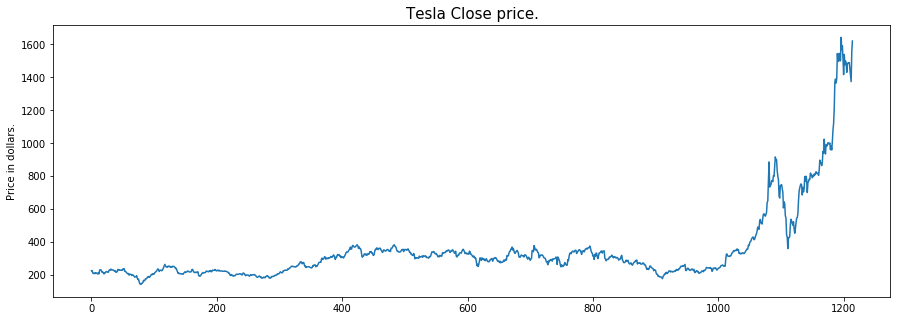

In [24]:
plt.figure(figsize=(15,5))
plt.plot(data['Close(t)'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 6 columns):
Date        1215 non-null object
Open        1215 non-null float64
High        1215 non-null float64
Low         1215 non-null float64
Close(t)    1215 non-null float64
Volume      1215 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 57.0+ KB


In [11]:
data = data.dropna()
data

,Date,Open,High,Low,Close(t),Volume
0,2015-10-16,223.04,230.48,222.87,227.01,4334500
1,2015-10-19,226.50,231.15,224.94,228.10,2507900
2,2015-10-20,227.72,228.60,202.00,213.03,14900000
3,2015-10-21,211.99,214.81,208.80,210.09,4151500
4,2015-10-22,211.56,215.75,209.40,211.72,2825200
5,2015-10-23,215.00,215.35,207.69,209.09,4235500
6,2015-10-26,211.38,215.88,210.00,215.26,3391400
7,2015-10-27,214.84,217.10,207.51,210.35,3519400
8,2015-10-28,211.31,213.45,208.30,212.96,2728600
9,2015-10-29,211.75,213.75,210.64,211.63,1805000


In [12]:
data.describe()

,Open,High,Low,Close(t),Volume
count,1215.000000,1215.000000,1215.000000,1215.000000,1.215000e+03
mean,351.600230,359.042494,343.888881,351.714757,8.308335e+06
std,238.700571,246.723225,229.885587,238.415741,6.053676e+06
min,142.320000,154.970000,141.050000,143.670000,7.080000e+05
25%,229.065000,231.990000,225.225000,229.045000,4.491900e+06
50%,297.700000,303.000000,291.620000,297.180000,6.486000e+06
75%,344.950000,349.490000,338.450000,344.675000,9.873150e+06
max,1678.950000,1794.990000,1567.260000,1643.000000,6.093880e+07


In [13]:
x = data[['High','Low','Open','Volume']].values
y = data['Close(t)'].values
print(x)

[[2.30480e+02 2.22870e+02 2.23040e+02 4.33450e+06]
 [2.31150e+02 2.24940e+02 2.26500e+02 2.50790e+06]
 [2.28600e+02 2.02000e+02 2.27720e+02 1.49000e+07]
 ...
 [1.42000e+03 1.36500e+03 1.39600e+03 8.62580e+06]
 [1.58500e+03 1.43500e+03 1.47000e+03 2.18988e+07]
 [1.65118e+03 1.56726e+03 1.61100e+03 2.04253e+07]]


In [14]:
print(y)

[ 227.01  228.1   213.03 ... 1374.39 1554.76 1621.  ]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
Model = LinearRegression()

Model.fit(x_train,y_train)
print(Model.coef_)

predicted = Model.predict(x_test)
print(predicted)

[ 9.11232507e-01  6.50731854e-01 -5.65546667e-01 -1.86664582e-07]
[ 306.70701031  342.16632618  254.95038995  249.27032532  223.36052134
  314.93554128  265.81608744  268.64526253  336.98492276  250.16614151
  276.57418381  295.73262831  331.02584457  291.97959397  256.60722258
  305.86314962  228.01163751  327.85121264  228.10833033  305.4665396
  227.92915669  227.67767377  355.21399671  342.06823321  189.41495136
  354.88430404  297.47492546  323.11057362  766.04514029  191.73621707
  429.68040073  770.18504827  890.56308613  342.54995033  324.55807914
 1449.20079789  354.65359601  285.03108928  253.03622068  330.86118689
  349.64313462  195.43890272  270.93319081  313.5307335   213.07310549
  266.97844298  251.59054516  342.01740055  310.92341838  198.74641473
  888.18823911  318.48714254  307.45169749  354.80257076  295.96371579
  213.29815693  347.83378035  148.80023665  294.94510203  294.00515263
 1516.69002048  320.92915314  275.22549722  256.57013288  938.42999446
  364.526680

In [17]:
data1 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,307.88,306.707010
1,344.00,342.166326
2,257.00,254.950390
3,247.89,249.270325
4,221.53,223.360521
5,317.81,314.935541
6,264.53,265.816087
7,267.77,268.645263
8,335.45,336.984923
9,249.24,250.166142


In [18]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 3.444886113036985
Mean Squared Error: 94.16768169615975
Root Mean Squared Error: 9.704003385003519


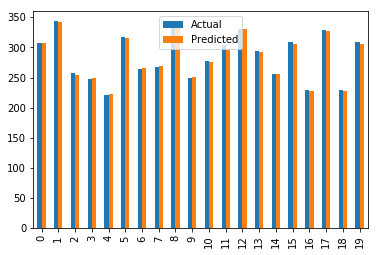

In [19]:
graph = data1.head(20)
graph.plot(kind='bar')

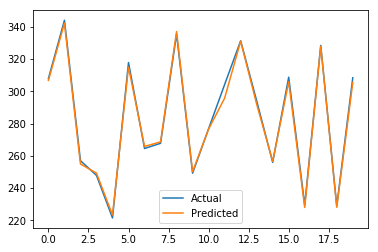

In [20]:
graph = data1.head(20)
graph.plot(kind='line')

In [21]:
mape = np.mean(np.abs((y_test - predicted)/y_test))*100
print('Accuracy:',mape*100)

Accuracy: 84.19195153164644
